### Group 8

In [136]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# One Hot Encoding
from sklearn.compose import ColumnTransformer

# Training set and Test set
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV

# Feature Scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# Keras Libraries 
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Plotting
import seaborn as sns

# Classifiers
from scikeras.wrappers import KerasClassifier

# Metrics 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, classification_report, accuracy_score



## Part 1: Data Preprocessing

In [2]:
dataset = pd.read_csv('online_shoppers_intention.csv')

In [3]:
# Creating the X and Y Variable
X = dataset.iloc[:, 1:18].values
Y = dataset.iloc[:, 17:19].values

In [4]:
# For the Dataset Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### B. Encoding the Categorical Data

In [5]:
# B.1 One Hot Encoding the "Month" Column to Create Dummy Variable

ct =  ColumnTransformer([('Month', OneHotEncoder(categories = 'auto'), [9])], remainder = 'passthrough')

X = ct.fit_transform(X)

In [6]:
# B.2. Label Encoding the "Gender" Column to convert it to Numeric

le = LabelEncoder()
X[:, 23] = le.fit_transform(X[:, 23])
X[:, 24] = le.fit_transform(X[:, 24])

X = X.astype(float)


In [7]:
# C. Splitting the dataset into the Training Dataset and Testing Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size = 0.2, random_state = 0)

In [8]:
# D. Perform Feature Scaling
ss = StandardScaler()

X_train_standard = X_train.copy()
X_test_standard = X_test.copy()

X_train_standard = ss.fit_transform(X_train_standard)
X_test_standard = ss.transform(X_test_standard)

# Part 2: Building the Artificial Neural Network Model

In [9]:
# B. Initialize the ANN
classifier = Sequential()

In [10]:
# C. Adding the Input Layer and the First Hidden Layer
classifier.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
classifier.add(Dropout(rate = 0.1))

In [11]:
# D. Adding the Second Hidden Layer
classifier.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))


In [12]:
# E. Adding the Output Layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Part 3: Training the ANN Model

In [13]:
# A. Compile the ANN Model

classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [14]:
# B. Fitting the ANN Model on the Training Dataset

classifier.fit(X_train_standard, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50


987/987 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.8701
Epoch 2/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0641 - accuracy: 0.9812
Epoch 3/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0310 - accuracy: 0.9907
Epoch 4/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0206 - accuracy: 0.9948
Epoch 5/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0149 - accuracy: 0.9956
Epoch 6/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0108 - accuracy: 0.9971
Epoch 7/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0108 - accuracy: 0.9971
Epoch 8/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0088 - accuracy: 0.9962
Epoch 9/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0072 - accuracy: 0.9983
Epoch 10/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0051 - accuracy: 0.99

## Part 4: Making Predictions and Evaluating the ANN Model

In [15]:
# A. Predict the Output of the Testing Dataset

Y_predict_probability = classifier.predict(X_test_standard)
Y_predict = np.rint(Y_predict_probability)

78/78 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Actual Value')

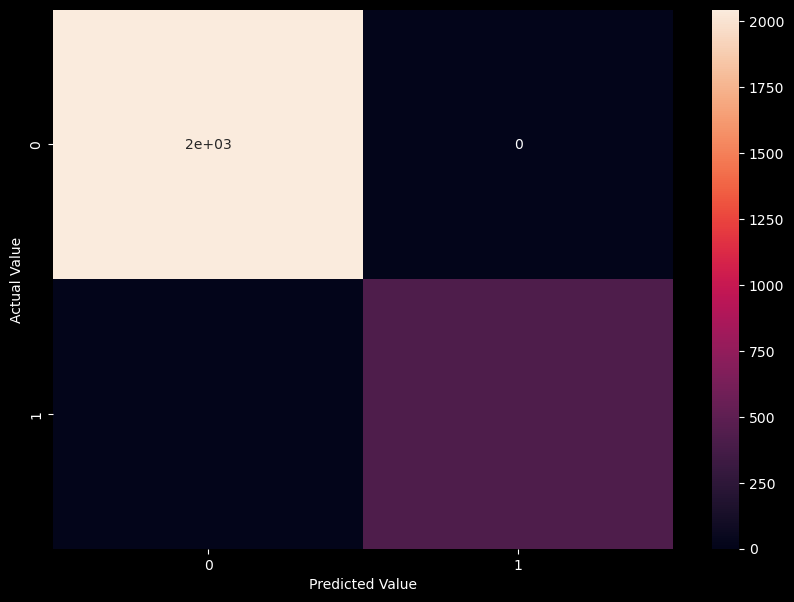

In [16]:
# B. To Generate and Plot the Confusion Matrix
confusion_mx = confusion_matrix(Y_test, Y_predict)

plt.figure(figsize = (10, 7))
sns.heatmap(confusion_mx, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [17]:
# C. Computing the Hold-Out Accuracy
accuracy = accuracy_score(Y_test, Y_predict)
print("Hold-Out Accuracy:")
print(accuracy)
print(" ")

Hold-Out Accuracy:
1.0
 


In [18]:
# D. Generating the Classification Report
print('Classification Report:')
print(classification_report(Y_test, Y_predict))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2044
        True       1.00      1.00      1.00       422

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



## Part 5: Perform K-Fold Cross Validation to Assess the ANN Model Performance

In [19]:
# A. To Feature SCale the X Variable Using the StandardScaler

X_standard = X.copy()
X_standard = ss.fit_transform(X_standard)

In [20]:
# B. Building the ANN Classifier Using KerasClassifier
def classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier.add(Dropout(rate = 0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

ann_model = KerasClassifier(model=classifier, batch_size=10, epochs = 50, verbose = 0)


In [21]:
# D. Import the Cross Val Score Class
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=0)

In [22]:
# For the Accuracy as Scoring Metrics for the Cross-Validation
accuracies = cross_val_score(estimator=ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "accuracy", n_jobs = -1)
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print('Accuracies of k-folds:', accuracies)
print(" ")
print("Average of the Accuracies of k-folds:", accuracies_average)
print(" ")
print('Standard Deviation of the Accuracies of k-foldsP:', accuracies_standard_deviation)
print(" ")


Accuracies of k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of the Accuracies of k-folds: 1.0
 
Standard Deviation of the Accuracies of k-foldsP: 0.0
 


In [23]:
# For the F1 as Scoring Metrics for the Cross-Validation
f1 =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'f1', n_jobs = -1))
f1_average = f1.mean()
f1__standard_deviation = f1.std()

print('F1-Score of the k-folds:', f1)
print(" ")
print('Average of F1-Score of the k-folds:', f1_average)
print(" ")
print('Standard Deviation of F1-Score of the k-fold:', f1__standard_deviation)
print(' ')

F1-Score of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of F1-Score of the k-folds: 1.0
 
Standard Deviation of F1-Score of the k-fold: 0.0
 


In [24]:
# For the Precision as Scoring Metrics for the Cross-Validation
precision =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'precision', n_jobs = -1))
precision_average = precision.mean()
precision__standard_deviation = precision.std()

print('Precision of the k-folds:', precision)
print(" ")
print('Average of Precision of the k-folds:', precision_average)
print(" ")
print('Standard Deviation of Precision of the k-fold:', precision__standard_deviation)
print(' ')

Precision of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of Precision of the k-folds: 1.0
 
Standard Deviation of Precision of the k-fold: 0.0
 


In [25]:
# For the Recall as Scoring Metrics for the Cross-Validation
recall =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'recall', n_jobs = -1))
recall_average = recall.mean()
recall__standard_deviation = recall.std()

print('Recall of the k-folds:', recall)
print(" ")
print('Average of Recall of the k-folds:', recall_average)
print(" ")
print('Standard Deviation of Recall of the k-fold:', recall__standard_deviation)
print(' ')

Recall of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of Recall of the k-folds: 1.0
 
Standard Deviation of Recall of the k-fold: 0.0
 


In [26]:
# For the Roc-Auc as Scoring Metrics for the Cross-Validation
rocauc =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'roc_auc', n_jobs = -1))
rocauc_average = rocauc.mean()
rocauc__standard_deviation = rocauc.std()

print('ROC-AUC of the k-folds:', rocauc)
print(" ")
print('Average of ROC-AUC of the k-folds:', rocauc_average)
print(" ")
print('Standard Deviation of ROC-AUC of the k-fold:', rocauc__standard_deviation)
print(' ')

ROC-AUC of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of ROC-AUC of the k-folds: 1.0
 
Standard Deviation of ROC-AUC of the k-fold: 0.0
 


### Part 6: Hold Out Validation

In [27]:
# A. For the Classification Accuracy

classification_accuracy = accuracy_score(Y_test, Y_predict)
print('Classification Accuracy: %.4f'
      %classification_accuracy)
print('')


Classification Accuracy: 1.0000



In [28]:
# B. For the Classification Error
classification_error = 1 - classification_accuracy
print('Classification Error: %.4f'
      %classification_error)
print('')

Classification Error: 0.0000



In [29]:
# C. For the Sensitivity, Recall Score, Probablity of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict, average = 'weighted')
print('Sensitivity: %.4f'
      %sensitivity)
print('')

Sensitivity: 1.0000



In [30]:
# G. For the Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict, average = 'weighted')
print('Precision Score: %.4f'
      %precision)
print('')

Precision Score: 1.0000



In [31]:
# H. For the F1-Score
f1 = f1_score(Y_test, Y_predict, average = 'weighted')
print('F1-Score: %.4f'
      %f1)
print('')

F1-Score: 1.0000



# Part 7: Performing Hyperparameter Tuning to Optimized the ANN

### A. Tune First the Batch Size and Epochs

In [32]:
# A.1, Build the ANN Model for the Optimization Process

def classifier_optimization():
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier_optimization.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0)

In [33]:
# A.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'batch_size': [50, 100, 150, 200, 250],
              'epochs': [10, 50, 100, 150, 200]}
grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(model=<function classifier_optimization at 0x000001EC05B3FBA0>, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [50, 100, 150, 200, 250],
                         'epochs': [10, 50, 100, 150, 200]},
             scoring='accuracy')


In [34]:
# A.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

    mean_test_score  std_test_score                              params
0          0.999108        0.000765    {'batch_size': 50, 'epochs': 10}
1          0.999919        0.000243    {'batch_size': 50, 'epochs': 50}
2          1.000000        0.000000   {'batch_size': 50, 'epochs': 100}
3          0.999919        0.000243   {'batch_size': 50, 'epochs': 150}
4          1.000000        0.000000   {'batch_size': 50, 'epochs': 200}
5          0.996756        0.002513   {'batch_size': 100, 'epochs': 10}
6          0.999838        0.000324   {'batch_size': 100, 'epochs': 50}
7          0.999919        0.000243  {'batch_size': 100, 'epochs': 100}
8          1.000000        0.000000  {'batch_size': 100, 'epochs': 150}
9          1.000000        0.000000  {'batch_size': 100, 'epochs': 200}
10         0.991484        0.004475   {'batch_size': 150, 'epochs': 10}
11         0.999757        0.000519   {'batch_size': 150, 'epochs': 50}
12         0.999919        0.000243  {'batch_size': 150, 'epochs

In [35]:
# A.5. To Identify the Best Accuracy and the Best Features
best_parameters_A = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_A)
print(" ")

Best Accuracy Score:
1.0
 
Best Parameters:
{'batch_size': 50, 'epochs': 100}
 


### B. Tune Next the Optimizer

In [36]:
# B.1, Build the ANN Model for the Optimization Process
def classifier_optimization(optimizer='sgd'):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    classifier_optimization.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0, **best_parameters_A)

In [37]:
# B.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'optimizer': ['adam', 'sgd', 'rmsprop', 'adamW', 'adadelta', 'adagrad', 'adamax', 'adafactor', 'ftrl', 'lion']}

grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, epochs=100, model=<function classifier_optimization at 0x000001EC067644A0>, verbose=0),
             n_jobs=-1,
             param_grid={'optimizer': ['adam', 'sgd', 'rmsprop', 'adamW',
                                       'adadelta', 'adagrad', 'adamax',
                                       'adafactor', 'ftrl', 'lion']},
             scoring='accuracy')


In [38]:
# B.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)


   mean_test_score  std_test_score                      params
0         1.000000        0.000000       {'optimizer': 'adam'}
1         0.999919        0.000243        {'optimizer': 'sgd'}
2         1.000000        0.000000    {'optimizer': 'rmsprop'}
3         1.000000        0.000000      {'optimizer': 'adamW'}
4         0.999919        0.000243   {'optimizer': 'adadelta'}
5         0.999919        0.000243    {'optimizer': 'adagrad'}
6         1.000000        0.000000     {'optimizer': 'adamax'}
7         1.000000        0.000000  {'optimizer': 'adafactor'}
8         0.999919        0.000243       {'optimizer': 'ftrl'}
9         1.000000        0.000000       {'optimizer': 'lion'}


In [39]:
# B.5. To Identify the Best Accuracy and the Best Features
best_parameters_B = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_B)
print(" ")

Best Accuracy Score:
1.0
 
Best Parameters:
{'optimizer': 'adam'}
 


### C. Tune Next the Optimizer's Learning Rate and Momentum

In [40]:
# C.1. Build the ANN Model for the Optimization Process
if best_parameters_B['optimizer'] == 'adam':
    from keras.optimizers import Adam
elif best_parameters_B['optimizer'] == 'sgd':
    from keras.optimizers import SGD
elif best_parameters_B['optimizer'] == 'rmsprop':
    from keras.optimizers import RMSprop
elif best_parameters_B['optimizer'] == 'adamW':
    from keras.optimizers import AdamW
elif best_parameters_B['optimizer'] == 'adadelta':
    from keras.optimizers import Adadelta
elif best_parameters_B['optimizer'] == 'adagrad':
    from keras.optimizers import Adagrad
elif best_parameters_B['optimizer'] == 'adamax':
    from keras.optimizers import Adamax
elif best_parameters_B['optimizer'] == 'adafactor':
    from keras.optimizers import Adafactor
elif best_parameters_B['optimizer'] == 'ftrl':
    from keras.optimizers import Ftrl
elif best_parameters_B['optimizer'] == 'lion':
    from keras.optimizers import Lion
   

def classifier_optimization(learning_rate, ema_momentum):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = 'glorot_uniform', activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = 'glorot_uniform', activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
    if best_parameters_B['optimizer'] == 'adam':
        optimizer_setting = Adam(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'sgd':
        optimizer_setting = SGD(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'rmsprop':
        optimizer_setting = RMSprop(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'adamW':
        optimizer_setting = AdamW(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'adadelta':
        optimizer_setting = Adadelta(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'adagrad':
        optimizer_setting = Adagrad(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'adamax':
        optimizer_setting = Adamax(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'adafactor':
        optimizer_setting = Adafactor(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'ftrl':
        optimizer_setting = Ftrl(learning_rate = learning_rate, ema_momentum = ema_momentum)
    elif best_parameters_B['optimizer'] == 'lion':
        optimizer_setting = Lion(learning_rate = learning_rate, ema_momentum = ema_momentum)
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0, **best_parameters_A, learning_rate = 0.001, ema_momentum = 0.0)


In [41]:
# C.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'learning_rate': [0.001, 0.01, 0.1, 1],
              'ema_momentum': [1, 1.5, 2, 3, 0.8, 0.99]}
grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, ema_momentum=0.0, epochs=100, learning_rate=0.001, model=<function classifier_optimization at 0x000001EC06766F20>, verbose=0),
             n_jobs=-1,
             param_grid={'ema_momentum': [1, 1.5, 2, 3, 0.8, 0.99],
                         'learning_rate': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')


In [42]:
# C.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

    mean_test_score  std_test_score  \
0          0.999919        0.000243   
1          1.000000        0.000000   
2          1.000000        0.000000   
3          0.845255        0.000324   
4          1.000000        0.000000   
5          1.000000        0.000000   
6          1.000000        0.000000   
7          0.845255        0.000324   
8          1.000000        0.000000   
9          1.000000        0.000000   
10         0.999757        0.000519   
11         0.845255        0.000324   
12         1.000000        0.000000   
13         1.000000        0.000000   
14         0.999919        0.000243   
15         0.845255        0.000324   
16         1.000000        0.000000   
17         1.000000        0.000000   
18         1.000000        0.000000   
19         0.845255        0.000324   
20         1.000000        0.000000   
21         1.000000        0.000000   
22         0.999027        0.001912   
23         0.845337        0.000372   

                        

In [43]:
# C.5. To Identify the Best Accuracy and the Best Features
best_parameters_C = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_C)
print(" ")


Best Accuracy Score:
1.0
 
Best Parameters:
{'ema_momentum': 1, 'learning_rate': 0.01}
 


### D. Tuning of Network's Weight Initialization

In [44]:
# D.1. Build the ANN Model for the Optimization Process
if best_parameters_B['optimizer'] == 'adam':
    optimizer_setting = Adam(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'sgd':
    optimizer_setting = SGD(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'rmsprop':
    optimizer_setting = RMSprop(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamW':
    optimizer_setting = AdamW(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adadelta':
    optimizer_setting = Adadelta(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adagrad':
    optimizer_setting = Adagrad(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamax':
    optimizer_setting = Adamax(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adafactor':
    optimizer_setting = Adafactor(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'ftrl':
    optimizer_setting = Ftrl(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'lion':
    optimizer_setting = Lion(**best_parameters_C)
    
def classifier_optimization(kernel_initializer):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, kernel_initializer = kernel_initializer, activation = 'relu', input_dim = 26))
    classifier_optimization.add(Dense(units = 13, kernel_initializer = kernel_initializer, activation = 'relu'))
    classifier_optimization.add(Dense(units = 1, kernel_initializer = kernel_initializer, activation = 'sigmoid'))
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0, **best_parameters_A,  kernel_initializer = 'golorot_uniform')


In [45]:
# D.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'kernel_initializer': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_uniform', 'glorot_normal', 'he_normal', 'he_uniform']}
grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, epochs=100, kernel_initializer='golorot_uniform', model=<function classifier_optimization at 0x000001EC067656C0>, verbose=0),
             n_jobs=-1,
             param_grid={'kernel_initializer': ['uniform', 'lecun_uniform',
                                                'normal', 'zero',
                                                'glorot_uniform',
                                                'glorot_normal', 'he_normal',
                                                'he_uniform']},
             scoring='accuracy')


In [46]:
# D.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

   mean_test_score  std_test_score                                    params
0         1.000000        0.000000         {'kernel_initializer': 'uniform'}
1         1.000000        0.000000   {'kernel_initializer': 'lecun_uniform'}
2         1.000000        0.000000          {'kernel_initializer': 'normal'}
3         0.845255        0.000324            {'kernel_initializer': 'zero'}
4         1.000000        0.000000  {'kernel_initializer': 'glorot_uniform'}
5         1.000000        0.000000   {'kernel_initializer': 'glorot_normal'}
6         1.000000        0.000000       {'kernel_initializer': 'he_normal'}
7         1.000000        0.000000      {'kernel_initializer': 'he_uniform'}


In [47]:
# D.5. To Identify the Best Accuracy and the Best Features
best_parameters_D = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_D)
print(" ")


Best Accuracy Score:
1.0
 
Best Parameters:
{'kernel_initializer': 'uniform'}
 


### E. Tuning of Neuron Activation Function

In [48]:
# E.1. Build the ANN Model for the Optimization Process
from scikeras.wrappers import KerasClassifier
if best_parameters_B['optimizer'] == 'adam':
    optimizer_setting = Adam(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'sgd':
    optimizer_setting = SGD(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'rmsprop':
    optimizer_setting = RMSprop(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamW':
    optimizer_setting = AdamW(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adadelta':
    optimizer_setting = Adadelta(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adagrad':
    optimizer_setting = Adagrad(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamax':
    optimizer_setting = Adamax(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adafactor':
    optimizer_setting = Adafactor(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'ftrl':
    optimizer_setting = Ftrl(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'lion':
    optimizer_setting = Lion(**best_parameters_C)

def classifier_optimization(activation1, activation2, activation3):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, **best_parameters_D, activation = activation1, input_dim = 26))
    classifier_optimization.add(Dense(units = 13, **best_parameters_D, activation = activation2))
    classifier_optimization.add(Dense(units = 1,  **best_parameters_D, activation = activation3))
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0, **best_parameters_A, activation1 = 'softmax', activation2 = 'softmax', activation3 = 'softmax')


In [49]:
# E.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'activation1': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
              'activation2': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
              'activation3': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']}


grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)


c:\Users\RenzCute\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(activation1='softmax', activation2='softmax', activation3='softmax', batch_size=50, epochs=100, model=<function classifier_optimization at 0x000001EC07ED9E40>, verbose=0),
             n_jobs=-1,
             param_grid={'activation1': ['softmax', 'softplus', 'softsign',
                                         'relu', 'tanh', 'sigmoid',
                                         'hard_sigmoid', 'linear'],
                         'activation2': ['softmax', 'softplus', 'softsign',
                                         'relu', 'tanh', 'sigmoid',
                                         'hard_sigmoid', 'linear'],
                         'activation3': ['softmax', 'softplus', 'softsign',
                                         'relu', 'tanh', 'sigmoid',
                                         'hard_sigmoid', 'linear']},
             scoring='accuracy')


In [50]:
# E.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

     mean_test_score  std_test_score  \
0           0.154745        0.000324   
1           1.000000        0.000000   
2           0.891646        0.070934   
3           0.953528        0.070811   
4           0.907218        0.075757   
..               ...             ...   
507         1.000000        0.000000   
508         0.984428        0.046446   
509         1.000000        0.000000   
510         1.000000        0.000000   
511         1.000000        0.000000   

                                                params  
0    {'activation1': 'softmax', 'activation2': 'sof...  
1    {'activation1': 'softmax', 'activation2': 'sof...  
2    {'activation1': 'softmax', 'activation2': 'sof...  
3    {'activation1': 'softmax', 'activation2': 'sof...  
4    {'activation1': 'softmax', 'activation2': 'sof...  
..                                                 ...  
507  {'activation1': 'linear', 'activation2': 'line...  
508  {'activation1': 'linear', 'activation2': 'line...  
509  {

In [51]:
# E.5. To Identify the Best Accuracy and the Best Features
best_parameters_E = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_E)
print(" ")


Best Accuracy Score:
1.0
 
Best Parameters:
{'activation1': 'softmax', 'activation2': 'softmax', 'activation3': 'softplus'}
 


### F. Tune Next the Dropout Regularization

In [67]:
# F1. Build the ANN Model for the Optimization Process
from scikeras.wrappers import KerasClassifier
if best_parameters_B['optimizer'] == 'adam':
    optimizer_setting = Adam(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'sgd':
    optimizer_setting = SGD(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'rmsprop':
    optimizer_setting = RMSprop(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamW':
    optimizer_setting = AdamW(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adadelta':
    optimizer_setting = Adadelta(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adagrad':
    optimizer_setting = Adagrad(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamax':
    optimizer_setting = Adamax(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adafactor':
    optimizer_setting = Adafactor(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'ftrl':
    optimizer_setting = Ftrl(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'lion':
    optimizer_setting = Lion(**best_parameters_C)

def classifier_optimization(rate):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = 14, **best_parameters_D, activation = best_parameters_E['activation1'], input_dim = 26))
    classifier_optimization.add(Dropout(rate = rate))
    classifier_optimization.add(Dense(units = 13, **best_parameters_D, activation = best_parameters_E['activation2']))
    classifier_optimization.add(Dropout(rate = rate))
    classifier_optimization.add(Dense(units = 1, **best_parameters_D, activation = best_parameters_E['activation3']))
    classifier_optimization.add(Dropout(rate = rate))
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0, **best_parameters_A, rate = 0.0)


In [68]:
# F.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'rate': [0.0, 0.1, 0.2, 0.3, 0.6, 0.8]} # Pwede pang magdagdag

grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, epochs=100, model=<function classifier_optimization at 0x000001EC0C40BCE0>, rate=0.0, verbose=0),
             n_jobs=-1, param_grid={'rate': [0.0, 0.1, 0.2, 0.3, 0.6, 0.8]},
             scoring='accuracy')


In [69]:
# F.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

   mean_test_score  std_test_score         params
0         1.000000        0.000000  {'rate': 0.0}
1         1.000000        0.000000  {'rate': 0.1}
2         1.000000        0.000000  {'rate': 0.2}
3         1.000000        0.000000  {'rate': 0.3}
4         0.154745        0.000324  {'rate': 0.6}
5         0.154745        0.000324  {'rate': 0.8}


In [70]:
# F.5. To Identify the Best Accuracy and the Best Features
best_parameters_F = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_F)
print(" ")

Best Accuracy Score:
1.0
 
Best Parameters:
{'rate': 0.0}
 


### G. Tune Next the Number of Neurons in the Hidden Layer

In [72]:
# G1. Build the ANN Model for the Optimization Process
if best_parameters_B['optimizer'] == 'adam':
    optimizer_setting = Adam(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'sgd':
    optimizer_setting = SGD(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'rmsprop':
    optimizer_setting = RMSprop(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamW':
    optimizer_setting = AdamW(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adadelta':
    optimizer_setting = Adadelta(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adagrad':
    optimizer_setting = Adagrad(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamax':
    optimizer_setting = Adamax(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adafactor':
    optimizer_setting = Adafactor(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'ftrl':
    optimizer_setting = Ftrl(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'lion':
    optimizer_setting = Lion(**best_parameters_C)

def classifier_optimization(neurons1, neurons2):
    classifier_optimization = Sequential()
    classifier_optimization.add(Dense(units = neurons1, **best_parameters_D, activation = best_parameters_E['activation1'], input_dim = 26))
    classifier_optimization.add(Dropout(**best_parameters_F))
    classifier_optimization.add(Dense(units = neurons2, **best_parameters_D, activation = best_parameters_E['activation2']))
    classifier_optimization.add(Dropout(**best_parameters_F))
    classifier_optimization.add(Dense(units = 1, **best_parameters_D, activation = best_parameters_E['activation3']))
    classifier_optimization.add(Dropout(**best_parameters_F))
    classifier_optimization.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_optimization

ann_model_optimization = KerasClassifier(model=classifier_optimization, verbose = 0, **best_parameters_A, neurons1 = 5, neurons2 = 5)

In [73]:
# G.3. To Set Parameters to be Optimized for the ANN Model
parameters = {'neurons1': [5, 10, 15, 20, 25, 30],
              'neurons2': [5, 10, 15, 20, 25, 30]} 

grid_search = GridSearchCV(estimator = ann_model_optimization, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = k_fold,
                           n_jobs = -1)

grid_search = grid_search.fit(X_standard, Y)
print(grid_search)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=KerasClassifier(batch_size=50, epochs=100, model=<function classifier_optimization at 0x000001EC0C40BBA0>, neurons1=5, neurons2=5, verbose=0),
             n_jobs=-1,
             param_grid={'neurons1': [5, 10, 15, 20, 25, 30],
                         'neurons2': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')


In [74]:
# G.4. To View the Results of the GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
print(results)

    mean_test_score  std_test_score                            params
0          1.000000        0.000000    {'neurons1': 5, 'neurons2': 5}
1          0.999919        0.000243   {'neurons1': 5, 'neurons2': 10}
2          0.999919        0.000243   {'neurons1': 5, 'neurons2': 15}
3          1.000000        0.000000   {'neurons1': 5, 'neurons2': 20}
4          1.000000        0.000000   {'neurons1': 5, 'neurons2': 25}
5          1.000000        0.000000   {'neurons1': 5, 'neurons2': 30}
6          1.000000        0.000000   {'neurons1': 10, 'neurons2': 5}
7          0.999838        0.000487  {'neurons1': 10, 'neurons2': 10}
8          1.000000        0.000000  {'neurons1': 10, 'neurons2': 15}
9          1.000000        0.000000  {'neurons1': 10, 'neurons2': 20}
10         0.999919        0.000243  {'neurons1': 10, 'neurons2': 25}
11         1.000000        0.000000  {'neurons1': 10, 'neurons2': 30}
12         1.000000        0.000000   {'neurons1': 15, 'neurons2': 5}
13         1.000000 

In [75]:
# G.5. To Identify the Best Accuracy and the Best Features
best_parameters_G = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Accuracy Score:")
print(best_accuracy)
print(" ")
print("Best Parameters:")
print(best_parameters_G)
print(" ")

Best Accuracy Score:
1.0
 
Best Parameters:
{'neurons1': 5, 'neurons2': 5}
 


## Part 8: Optimized Parameters

#### Repeat Part 2: Building the Artificial Neural Network Model

In [114]:
# B. Initialize the ANN
classifier_final = Sequential()

In [115]:
# C. Adding the Input Layer and the First Hidden Layer
classifier_final.add(Dense(units = best_parameters_G['neurons1'], **best_parameters_D, activation = best_parameters_E['activation1'], input_dim = 26))
classifier_final.add(Dropout(**best_parameters_F))

In [116]:
# D. Adding the Second Hidden Layer
classifier_final.add(Dense(units = best_parameters_G['neurons2'], **best_parameters_D, activation = best_parameters_E['activation2']))
classifier_final.add(Dropout(**best_parameters_F))


In [117]:
# E. Adding the Output Layer
classifier_final.add(Dense(units = 1, **best_parameters_D, activation = best_parameters_E['activation3']))

#### Repeat Part 3: Training the ANN Model

In [118]:
# A. Compile the ANN Model
if best_parameters_B['optimizer'] == 'adam':
    optimizer_setting = Adam(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'sgd':
    optimizer_setting = SGD(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'rmsprop':
    optimizer_setting = RMSprop(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamW':
    optimizer_setting = AdamW(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adadelta':
    optimizer_setting = Adadelta(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adagrad':
    optimizer_setting = Adagrad(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adamax':
    optimizer_setting = Adamax(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'adafactor':
    optimizer_setting = Adafactor(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'ftrl':
    optimizer_setting = Ftrl(**best_parameters_C)
elif best_parameters_B['optimizer'] == 'lion':
    optimizer_setting = Lion(**best_parameters_C)
    
classifier_final.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [119]:
# B. Fitting the ANN Model on the Training Dataset
classifier_final.fit(X_train_standard, Y_train, batch_size = 10, epochs = 50)

Epoch 1/50


987/987 [==============================] - 2s 1ms/step - loss: 0.1266 - accuracy: 0.9461
Epoch 2/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 3/50
987/987 [==============================] - 1s 1ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 4/50
987/987 [==============================] - 1s 1ms/step - loss: 6.6789e-04 - accuracy: 1.0000
Epoch 5/50
987/987 [==============================] - 1s 1ms/step - loss: 3.5821e-04 - accuracy: 1.0000
Epoch 6/50
987/987 [==============================] - 1s 1ms/step - loss: 2.0744e-04 - accuracy: 1.0000
Epoch 7/50
987/987 [==============================] - 1s 1ms/step - loss: 1.2536e-04 - accuracy: 1.0000
Epoch 8/50
987/987 [==============================] - 1s 1ms/step - loss: 7.1275e-05 - accuracy: 1.0000
Epoch 9/50
987/987 [==============================] - 1s 1ms/step - loss: 4.6955e-05 - accuracy: 1.0000
Epoch 10/50
987/987 [==============================] - 1s 1ms/step - loss: 2.7216e-05 -

#### Repeat Part 4: Making Predictions and Evaluating the ANN Model

In [120]:
# A. Predict the Output of the Testing Dataset

Y_predict_probability = classifier_final.predict(X_test_standard)
Y_predict = np.rint(Y_predict_probability) 

78/78 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Actual Value')

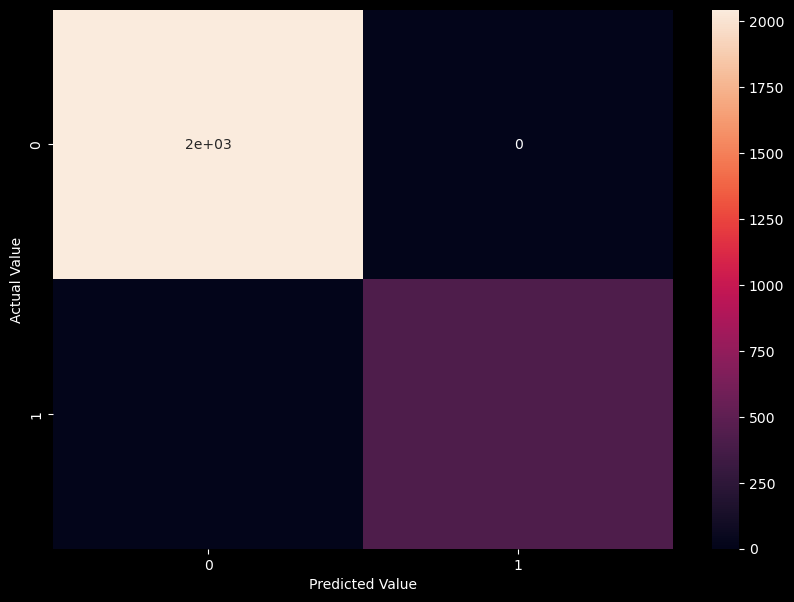

In [121]:
# B. To Generate and Plot the Confusion Matrix
confusion_mx = confusion_matrix(Y_test, Y_predict)

plt.figure(figsize = (10, 7))
sns.heatmap(confusion_mx, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [122]:
# C. Computing the Hold-Out Accuracy
accuracy = accuracy_score(Y_test, Y_predict)
print("Hold-Out Accuracy:")
print(accuracy)
print(" ")

Hold-Out Accuracy:
1.0
 


In [123]:
# D. Generating the Classification Report
print('Classification Report:')
print(classification_report(Y_test, Y_predict))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2044
        True       1.00      1.00      1.00       422

    accuracy                           1.00      2466
   macro avg       1.00      1.00      1.00      2466
weighted avg       1.00      1.00      1.00      2466



#### Repeat Part 5: Perform K-Fold Cross Validation to Assess the ANN Model Performance

In [124]:
# A. To Feature SCale the X Variable Using the StandardScaler

X_standard = X.copy()
X_standard = ss.fit_transform(X_standard)

In [125]:
# B. Building the ANN Classifier Using KerasClassifier
def classifier():
    classifier_final = Sequential()
    classifier_final.add(Dense(units = best_parameters_G['neurons1'], **best_parameters_D, activation = best_parameters_E['activation1'], input_dim = 26))
    classifier_final.add(Dropout(**best_parameters_F))
    classifier_final.add(Dense(units = best_parameters_G['neurons2'], **best_parameters_D, activation = best_parameters_E['activation2']))
    classifier_final.add(Dropout(**best_parameters_F))
    classifier_final.add(Dense(units = 1, **best_parameters_D, activation = best_parameters_E['activation3']))
    classifier_final.add(Dropout(**best_parameters_F))  
    classifier_final.compile(optimizer = optimizer_setting, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier_final

ann_model = KerasClassifier(model=classifier, verbose = 0, **best_parameters_A)


In [126]:
# D. Import the Cross Val Score Class
k_fold = StratifiedKFold(n_splits = 10, shuffle = True, random_state=0)

In [127]:
# For the Accuracy as Scoring Metrics for the Cross-Validation
accuracies = cross_val_score(estimator=ann_model, X = X_standard, y = Y, cv = k_fold, scoring = "accuracy", n_jobs = -1)
accuracies_average = accuracies.mean()
accuracies_standard_deviation = accuracies.std()

print('Accuracies of k-folds:', accuracies)
print(" ")
print("Average of the Accuracies of k-folds:", accuracies_average)
print(" ")
print('Standard Deviation of the Accuracies of k-foldsP:', accuracies_standard_deviation)
print(" ")


Accuracies of k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of the Accuracies of k-folds: 1.0
 
Standard Deviation of the Accuracies of k-foldsP: 0.0
 


In [128]:
# For the F1 as Scoring Metrics for the Cross-Validation
f1 =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'f1', n_jobs = -1))
f1_average = f1.mean()
f1__standard_deviation = f1.std()

print('F1-Score of the k-folds:', f1)
print(" ")
print('Average of F1-Score of the k-folds:', f1_average)
print(" ")
print('Standard Deviation of F1-Score of the k-fold:', f1__standard_deviation)
print(' ')

F1-Score of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of F1-Score of the k-folds: 1.0
 
Standard Deviation of F1-Score of the k-fold: 0.0
 


In [129]:
# For the Precision as Scoring Metrics for the Cross-Validation
precision =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'precision', n_jobs = -1))
precision_average = precision.mean()
precision__standard_deviation = precision.std()

print('Precision of the k-folds:', precision)
print(" ")
print('Average of Precision of the k-folds:', precision_average)
print(" ")
print('Standard Deviation of Precision of the k-fold:', precision__standard_deviation)
print(' ')

Precision of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of Precision of the k-folds: 1.0
 
Standard Deviation of Precision of the k-fold: 0.0
 


In [130]:
# For the Recall as Scoring Metrics for the Cross-Validation
recall =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'recall', n_jobs = -1))
recall_average = recall.mean()
recall__standard_deviation = recall.std()

print('Recall of the k-folds:', recall)
print(" ")
print('Average of Recall of the k-folds:', recall_average)
print(" ")
print('Standard Deviation of Recall of the k-fold:', recall__standard_deviation)
print(' ')

Recall of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of Recall of the k-folds: 1.0
 
Standard Deviation of Recall of the k-fold: 0.0
 


In [131]:
# For the Roc-Auc as Scoring Metrics for the Cross-Validation
rocauc =  (cross_val_score(estimator = ann_model, X = X_standard, y = Y, cv = k_fold, scoring = 'roc_auc', n_jobs = -1))
rocauc_average = rocauc.mean()
rocauc__standard_deviation = rocauc.std()

print('ROC-AUC of the k-folds:', rocauc)
print(" ")
print('Average of ROC-AUC of the k-folds:', rocauc_average)
print(" ")
print('Standard Deviation of ROC-AUC of the k-fold:', rocauc__standard_deviation)
print(' ')

ROC-AUC of the k-folds: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 
Average of ROC-AUC of the k-folds: 1.0
 
Standard Deviation of ROC-AUC of the k-fold: 0.0
 


### Part 6: Hold Out Validation

In [132]:
# A. For the Classification Accuracy

classification_accuracy = accuracy_score(Y_test, Y_predict)
print('Classification Accuracy: %.4f'
      %classification_accuracy)
print('')


Classification Accuracy: 1.0000



In [133]:
# B. For the Classification Error
classification_error = 1 - classification_accuracy
print('Classification Error: %.4f'
      %classification_error)
print('')

Classification Error: 0.0000



In [138]:
# C. For the Sensitivity, Recall Score, Probablity of Detection, True Positive Rate
sensitivity = recall_score(Y_test, Y_predict, average = 'weighted')
print('Sensitivity: %.4f'
      %sensitivity)
print('')

Sensitivity: 1.0000



In [140]:
# G. For the Precision or Positive Predictive Value
precision = precision_score(Y_test, Y_predict, average = 'weighted')
print('Precision Score: %.4f'
      %precision)
print('')

Precision Score: 1.0000



In [141]:
# H. For the F1-Score
f1 = f1_score(Y_test, Y_predict, average = 'weighted')
print('F1-Score: %.4f'
      %f1)
print('')

F1-Score: 1.0000

